<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В ходе исследования необходимо установить параметры, которые определяют рыночную стоимость квартиры. Это позволит автоматизировать систему.  

## Изучение данных из файла

Импортируем библиотеки, нужные для проведения анализа.

In [1]:
pip install calmap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calmap

Прочитаем файл с данными и сохраним его в df.

In [3]:
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    print('Не удалось найти файл по заданному пути.')

Выведем первые 10 строк таблицы.

In [4]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрм, на общую информацию о данных.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Расссмотрим полученную информацию. 
Всего в таблице 22 стобца:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения.

### Вывод

Наши данные - это архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. В каждой строке описана характеристика объявления о продаже квартиры. Прежде чем приступать к анализу данных, нужно привести данные к "нормальному" виду. 

## Предобработка данных

Что нужно сделать? 

* Найдём пропущенные значения и решим, что будем с ними делать.
* Проверим наши данные на дубликаты и избавимся от них. 
* Приведем наши значения к удобным типам данных.

Проверим данные на наличие пропусков и подсчитаем процент этих пропусков

In [6]:
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.style.background_gradient(cmap = 'RdPu')

,missing_values,% of total
total_images,0,0
last_price,0,0
total_area,0,0
first_day_exposition,0,0
rooms,0,0
ceiling_height,9195,0.39
floors_total,86,0
living_area,1903,0.08
floor,0,0
is_apartment,20924,0.88


Прежде чем решать, что будем делать с пропусками в данных, посмотрим на диапазон наших значений.

In [7]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Возвращаемся к заполнению пропусков. Берём первый столбец 'ceiling_height', в котором указана высота потолков. Сразу можем заметить в этом столбце аномальные значения. Потолки с высотой в 1 или 100 метров являются чем-то ненормальным для нашего мира. Предлагаю сразу отбросить найденные аномалии. Выведем диаграмму, чтобы увидеть, в каком диапазоне у нас лежат основные значения.

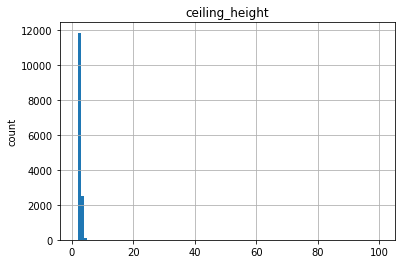

In [8]:
df.hist(column = 'ceiling_height', bins = 100)
plt.ylabel("count")
plt.show()

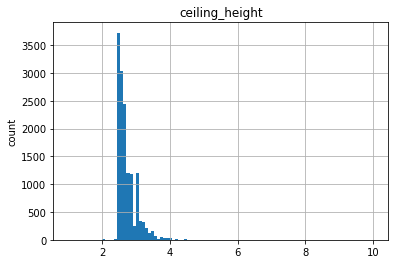

In [9]:
df.hist(column = 'ceiling_height', bins = 100, range = (1,10))
plt.ylabel("count")
plt.show()

Опираясь на графики, предлагаю выбрать диапазон [2.4м; 6м]. 2.4 метра - то минимальная норма высота потолка в России, можем увидеть, что в наших данных очень мало раз встречаются значения меньше этого. А максимальной допустимой высотой я выбрал 6 метров, т.к. я могу допустить, что такие квартиры существуют, но выше - это уже что-то из ряда фантастики, тем более значений выше очень мало, так что, если мы и откинем пару реальных значений, мы потеряем лишь очень малую часть данных, но зато избавимся от неправдоподобных данных, которые помешали бы нашей статистике.

In [10]:
df = df.query('ceiling_height >= 2.4 and ceiling_height <= 6')


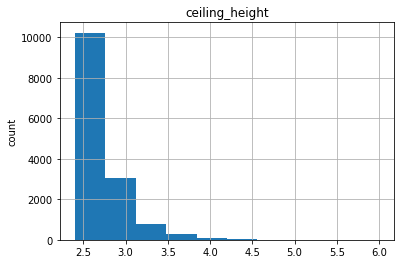

In [11]:
df.hist(column = 'ceiling_height', bins = 10)
plt.ylabel("count")
plt.show()

Это уже лучше, теперь наши значения больше похожи на правду. теперь предлагаю перейти к заполнению пропусков.

* Пропуски в столбце 'ceiling_height'
        Пропуски в этом столбце занимают 38% от общего количества значений. Значит, заполнять их статистическими значениями не совсем правильно. Заполним пропуски маркером в виде нуля, и при анализе будем держать это в уме.
* Пропуски в столбце 'floors_total'
        В этом столбце всего 86 пустых значений из 23699, это конечно не очень важная информация, но заполнять её, основываясь на статистику, не совсем правильно, а заполнение нулями нам помешают в дальнейшем в создании нового столбца "этаж квартиры" c вариантами: первый, последний, другой. Поэтому просто откинем их.
* Пропуски в столбцах 'living_area' и 'kitchen_area'. 
        Это столбцы (особенно столбце с общей площадью) имеют одно из главных значений, при формировании цены. Точно эти значения мы вычислить не сможем, а подставлять какие-либо выдуманные - это не совсем правильно, поэтому нам их придется отбросить.
* Пропуски в столбце 'is_apartment'
        Все пропущенные значения в столбце 'is_apartment' я заполню значениями False. Почему же я так строго с ним поступлю? Этих пропусков очень много, а я не верю, что в объявлениях о продаже квартиры преобладают апартаменты. Я допускаю, что люди, которые продают стандартную квартиру просто пропускают этот пункт, не предав ему значения.
* Пропуски в столбце 'balcony'
        В ситуации с балконами все просто, мы просто заполнем пропущенные значения нулем. Причина пропусков может быть схожа с причиной пропусков в столбце 'is_apartment', если в квартире нет балкона, люди просто проходят этот пункт, не заполняя его. Блакон в доме - всегда плюс, а зачем продавцу указывать на отсутствие плюса в его квартире.
* Пропуски в столбце 'locality_name'
        Что делать с пропусками в название региона, в котором находится квартира? А давайте соберем их в одну группу, и создадим регион "NoName", которому будут принадлежать квартиры с пропусками в данном столбце.
* Пропуски в столбцах 'ponds_around3000' и 'parks_around3000'
        Я хочу предложить заполнить все пропуски нулями, при условии, что в строках с расстоянием до ближайшего парка/водоёма будет или пустой, или будет иметь значение более 3000м. В противном случае заполним единицей. Сначала проверим, заполнены ли значений расстояния до ближайшего водоёма/парк в строках, где пропущены значения количества этих объектов в радиусе 3 км. Затем выберем способ заполнения пропусков. Проверку напишем ниже.
* Пропуски в столбцах 'ponds_nearest', 'parks_nearest', 'airports_nearest', 'cityCenters_nearest' и 'days_exposition'
        Эти пропуски я заполню нулями. Почему я так сделаю, потому что таких строк очень много, если мы их выбросим, то потеряем большую часть данных. А эти нулевые значения просто не будем использовать при проведении анализа.

Подведем итоги, что нам нужно сделать:
- Удалить строки с пропусками в столбцах: 'floors_total', 'living_area' и 'kitchen_area'.
- Заполнить нулями строки с пропусками в столбцах: 'balcony', 'ponds_nearest', 'parks_nearest', 'airports_nearest', 'cityCenters_nearest', 'days_exposition' и 'ponds_around3000' с 'parks_around3000'(после проперки условия).
- Заполнить пропуски в значения столбца 'locality_name' значением 'NoName'.
- Заполнить пропуски в столбце 'is_apartment' значением False.
- Заполнить пропуски в столбце 'ceiling_height' медианным значением.

Проверим, во всех ли строках с пропусками в 'ponds_around3000' и 'parks_around3000' пропущены и значения   'ponds_nearest' и 'parks_nearest'.

In [12]:
len(df[df['ponds_around3000'].isna() & df['ponds_nearest'].isna()]) == df['ponds_around3000'].isna().sum()


True

In [13]:
len(df[df['parks_around3000'].isna() & df['parks_nearest'].isna()]) == df['parks_around3000'].isna().sum()

True

Что мы имеем? Во всех строках, где пропущены значения количества водоёмов/парков в радиусе 3 км пропущены и значения расстояния до ближайшего парка/водоёма, так что все пропуски заполняем нулями.

Переходим к заполнению.

In [14]:
#удаляем строки с пропущенными значениями
columns_drop = ['floors_total', 'living_area', 'kitchen_area']
for column in columns_drop:
    df.dropna(subset = [column], inplace = True)

In [15]:
#Заполняем нулями строски с пропущенными значениями
columns_make_zero = [
    'balcony',
    'ponds_nearest',
    'parks_nearest',
    'airports_nearest',
    'cityCenters_nearest',
    'days_exposition', 
    'ponds_around3000',
    'parks_around3000',
    'ceiling_height'
]
for column in columns_make_zero:
    df[column] = df[column].fillna(0)

In [16]:
#Заполним значение оставшихся столбцев
df['locality_name'] = df['locality_name'].fillna('Noname')
df['is_apartment'] = df['is_apartment'].fillna(False)

Проверим, все ли пропуски мы заполнили.

In [17]:
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

Итак, мы справились с первой задачей - заполнили пропуски. Далее нам предстоит избавится от дубликатов в наших данных, для этого сначала проверим, есть ли они у нас.

In [18]:
df.duplicated().sum()

0

Давайте попробуем найти неявные дубликаты. Остановимся на столбце 'locality_name'. Приведём все значения столбца к нижнему регистру и совершим замену буквы 'ё' на 'е'.

In [19]:
# приводим значения к нижнему регистру
df['locality_name'] = df['locality_name'].str.lower()

In [20]:
df.duplicated().sum()

0

Дубликаты не появились. Заменим все вуквы 'ё', которые встречаются в названиях региново, на 'e'. Напишем функцию, которая будет изменять наши данные

In [21]:
def replase_letters(locality_name):
    string = str(locality_name)
    return string.replace('ё', 'е')

In [22]:
df['locality_name'] = df['locality_name'].apply(replase_letters)

In [23]:
df.duplicated().sum()

0

А нам повезло! Как ни старайся, нельзя найти то, чего нет. Осталось поменять тип данных у некоторых данных и предобработка готова.
Для начала выведем информацию о столбцах и вспомним, какие у нас данные.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13290 entries, 0 to 23698
Data columns (total 22 columns):
total_images            13290 non-null int64
last_price              13290 non-null float64
total_area              13290 non-null float64
first_day_exposition    13290 non-null object
rooms                   13290 non-null int64
ceiling_height          13290 non-null float64
floors_total            13290 non-null float64
living_area             13290 non-null float64
floor                   13290 non-null int64
is_apartment            13290 non-null bool
studio                  13290 non-null bool
open_plan               13290 non-null bool
kitchen_area            13290 non-null float64
balcony                 13290 non-null float64
locality_name           13290 non-null object
airports_nearest        13290 non-null float64
cityCenters_nearest     13290 non-null float64
parks_around3000        13290 non-null float64
parks_nearest           13290 non-null float64
ponds_around300

- Переопределим значения столбцев :('last_price', 'floors_total', 'balcony', 'ponds_nearest', 'parks_nearest', 'airports_nearest', 'cityCenters_nearest', 'days_exposition', 'ponds_around3000', 'parks_around3000') как тип int.
- Переведем значения столбца 'first_day_exposition' к формату дата и время.

In [25]:
columns_to_int = [
    'last_price',
    'floors_total',
    'balcony',
    'ponds_nearest',
    'parks_nearest',
    'airports_nearest',
    'cityCenters_nearest',
    'days_exposition',
    'ponds_around3000',
    'parks_around3000'
]
for column in columns_to_int:
    df[column] = df[column].astype('int')

In [26]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

Проверим, как поменялись наши данные.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13290 entries, 0 to 23698
Data columns (total 22 columns):
total_images            13290 non-null int64
last_price              13290 non-null int64
total_area              13290 non-null float64
first_day_exposition    13290 non-null datetime64[ns]
rooms                   13290 non-null int64
ceiling_height          13290 non-null float64
floors_total            13290 non-null int64
living_area             13290 non-null float64
floor                   13290 non-null int64
is_apartment            13290 non-null bool
studio                  13290 non-null bool
open_plan               13290 non-null bool
kitchen_area            13290 non-null float64
balcony                 13290 non-null int64
locality_name           13290 non-null object
airports_nearest        13290 non-null int64
cityCenters_nearest     13290 non-null int64
parks_around3000        13290 non-null int64
parks_nearest           13290 non-null int64
ponds_around3000     

### Вывод

Мы провели предобработку данных. Теперь наша структура данных не одержит пустых значений, дубликатов. Убрали явные аномальные значения. Привели данные к нужным типам. 
Теперь можем смело переходить к расчету и добавлению в таблицу результатов.

## Расчёты и добавление результатов в таблицу

Чем мы будем заниматься в этом разделе? 
Мы рассчитаем и добавим в таблицу:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

Переходим к первому пункту. Напишем функцию, которая будет получать на вход строку из нашей структуры данных и возвращать цену за квадратный метр и применем её к нашей структуре.

In [28]:
def do_price_per_sq_m(raw):
    last_price = raw['last_price']
    total_area = raw['total_area']
    return int(last_price / total_area)

In [29]:
df['price_per_sq_m'] = df.apply(do_price_per_sq_m, axis = 1)

Посмотрим на данные, которые мы получили.

In [30]:
df['price_per_sq_m'].head(10)

0     120370
4     100000
9      88524
10    127525
13     82943
16     81707
18    104838
19    117355
20     76500
22     86206
Name: price_per_sq_m, dtype: int64

Первый пункт выполнен. Теперь нам нудно добавить в таблицу столбики со значениями дня недели, месяца и года публикации объявления.
Напишем функциb, которst будen это выполнять.

In [31]:
df['day_posted'] = df['first_day_exposition'].apply(lambda first_day_exposition: first_day_exposition.day)
df['month_posted'] = df['first_day_exposition'].apply(lambda first_day_exposition: first_day_exposition.month)
df['year_posted'] = df['first_day_exposition'].apply(lambda first_day_exposition: first_day_exposition.year)

Выведем данные из столбца, который только что получили.

In [32]:
df['day_posted'].head()

0      7
4     19
9     26
10    16
13     1
Name: day_posted, dtype: int64

In [33]:
df['month_posted'].head()

0      3
4      6
9      2
10    11
13     7
Name: month_posted, dtype: int64

In [34]:
df['year_posted'].head()

0     2019
4     2018
9     2017
10    2017
13    2017
Name: year_posted, dtype: int64

Сделано! Теперь создадим групперовку по этажу квартиры с вариантами: первый, последний, другой. Добавим такой столбец в наши данные.

In [35]:
def do_group_for_floor(raw):
    floors_total = raw['floors_total']
    floor = raw['floor']
    if floor == floors_total:
        return 'последний'
    elif floor == 1:
        return 'первый'
    return 'другой'

In [36]:
df['floors_group'] = df.apply(do_group_for_floor, axis = 1)

Отоброзим на экране данные, которые мы получили.

In [37]:
df['floors_group'].head(10)

0        другой
4        другой
9        другой
10       другой
13    последний
16       первый
18       другой
19       другой
20       другой
22       другой
Name: floors_group, dtype: object

Да! Остался последний пункт и наша таблица будет готова к исследовательскому анализу данных. На последнем шаге нужно добавить два столбца с соотношениями жилой и общей площади, а также отношение площади кухни к общей. Этим мы сейчас и займемся. Напишем функцию...

In [38]:
#напишем функцию, которая возвращает отношение жилой и общей площади: 
def do_diff_living_total(raw):
    total_area = raw['total_area']
    living_area = raw['living_area']
    return round((living_area / total_area), 2)

#напишем функцию, которая возвращает отношение кухни и общей площади:
def do_diff_kitchen_total(raw):
    total_area = raw['total_area']
    kitchen_area = raw['kitchen_area']
    return round((kitchen_area / total_area), 2)

In [39]:
#добавим столбцы 'diff_living_total' и 'diff_kitchen_total' в наши анные:
df['diff_living_total'] = df.apply(do_diff_living_total, axis = 1)
df['diff_kitchen_total'] = df.apply(do_diff_kitchen_total, axis = 1)

Давайте проверим, как выглядят столбцы, которые мы добавили.

In [40]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,day_posted,month_posted,year_posted,floors_group,diff_living_total,diff_kitchen_total
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2,755,0,120370,7,3,2019,другой,0.47,0.23
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48,121,100000,19,6,2018,другой,0.32,0.41
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,0,0,289,88524,26,2,2017,другой,0.71,0.11
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,2,553,137,127525,16,11,2017,другой,0.51,0.21
13,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,False,...,3,298,366,82943,1,7,2017,последний,0.63,0.12
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,0,0,397,81707,23,11,2017,первый,0.68,0.11
18,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,False,...,0,0,168,104838,27,1,2017,другой,0.63,0.18
19,16,14200000,121.0,2019-01-09,3,2.75,16,76.0,8,False,...,0,0,97,117355,9,1,2019,другой,0.63,0.10
20,12,6120000,80.0,2017-09-28,3,2.70,27,48.0,11,False,...,0,0,74,76500,28,9,2017,другой,0.60,0.15
22,20,5000000,58.0,2017-04-24,2,2.75,25,30.0,15,False,...,0,0,60,86206,24,4,2017,другой,0.52,0.19


### Вывод

Подводим итоги. Какие расчёты мы сделали и что добавили в наши данные? Что мы для этого использовали?
Мы добавили Несколько новых характеристик в наши данные: цену за кв. метр; отношения разных частей площади; и добавили новый столбец с датой дня создания объявления. Для всех столбцов мы написали функции, которые получали на вход строк, обрабатывали их и возвращали результат. Затем функции применили к нашему DataFrame методом apply(). Ну что, остался последний и самый главный шаг: исследовательская работа. Для меня, это самая интересная часть данного проекта, так что предлагаю незамедлительно приступить к ней


## Исследовательский анализ данных

Переходим к последнему пункту нашей работы. В этой части нам нужно провести исследовательский анализ данных. Что мы будем делать:
* Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
* Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
* Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
* Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
* Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
* Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.
* Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Сначала используем метод describe() к нашему dataFrame. Взглянем на диапазон значений.

In [41]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,day_posted,month_posted,year_posted,diff_living_total,diff_kitchen_total
count,13290.000000,1.329000e+04,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000,...,13290.000000,13290.000000,13290.000000,13290.000000,1.329000e+04,13290.000000,13290.000000,13290.000000,13290.000000,13290.000000
mean,10.483446,6.814857e+06,61.936503,2.152596,2.725105,10.136343,35.797064,5.612415,10.529918,0.688488,...,175.405944,0.617983,206.075922,159.872536,1.013364e+05,15.490820,6.351317,2017.491648,0.568474,0.182861
std,5.605935,1.012762e+07,35.964091,1.087853,0.274968,6.158081,22.872616,4.592512,6.016395,1.012464,...,299.357847,0.902147,309.086599,220.978253,4.946776e+04,8.686111,3.494970,1.033329,0.101656,0.071720
min,0.000000,1.219000e+04,17.000000,1.000000,2.400000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.110000e+02,1.000000,1.000000,2014.000000,0.020000,0.030000
25%,6.000000,3.600000e+06,41.400000,1.000000,2.510000,5.000000,19.400000,2.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,16.000000,7.860900e+04,8.000000,3.000000,2017.000000,0.500000,0.130000
50%,10.000000,4.900000e+06,53.900000,2.000000,2.650000,9.000000,31.000000,4.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,75.000000,9.658600e+04,15.000000,6.000000,2018.000000,0.570000,0.170000
75%,15.000000,7.000000e+06,71.600000,3.000000,2.800000,14.000000,43.315000,7.000000,12.000000,1.000000,...,338.750000,1.000000,404.000000,205.000000,1.160000e+05,23.000000,10.000000,2018.000000,0.640000,0.220000
max,50.000000,4.200000e+08,900.000000,16.000000,6.000000,60.000000,409.700000,30.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.736842e+06,31.000000,12.000000,2019.000000,0.970000,0.720000


Переходим к выполнению первого пункта. Построим гистограммы для площади, цены, числа комнат, высоты потолков.

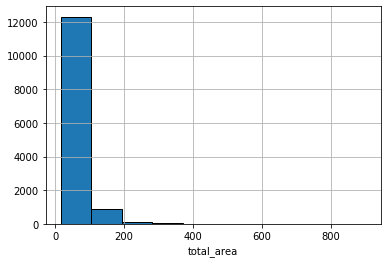

In [42]:
# гистограмма площади квартиры
df['total_area'].hist(edgecolor = "black")
plt.xlabel("total_area")
plt.show()

Почти все значения собрались в одном столбце. По такой гистограмме будет сложно что-то говорить. Выведем эту же гистограмму с увеличенным числом столбцев до 100.

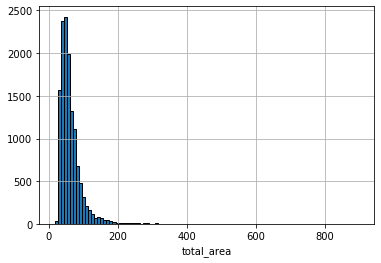

In [43]:
df['total_area'].hist(bins = 100, edgecolor = "black")
plt.xlabel("total_area")
plt.show()

Значительную часть гистограммы занимают близкие к нулю значения. Похоже на выбросы. 
Выведем эту же диаграмму, только с диапазоном значений (0,400)

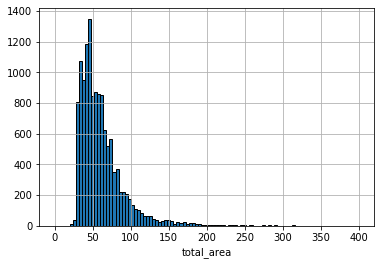

In [44]:
df['total_area'].hist(bins = 100, range = (0,400), edgecolor = 'black') 
plt.xlabel('total_area');

Мощный пик около 40 кв. м. Очень мало значений после 100 кв. м. Были и выбросы около 1000.

Перейдем к следующей части нашего пункта. Выведем гистограмму стоимости квартиры.

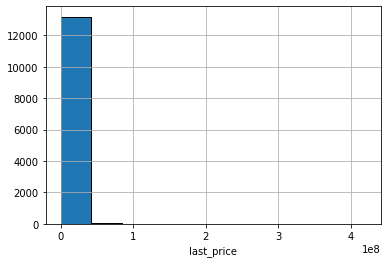

In [45]:
# гистограмма стоимости квартиры
df['last_price'].hist(edgecolor = 'black')
plt.xlabel('last_price');

Так же как и в прошлом случае, почти все значения собрались в одном столбце. Выведем эту же гистограмму с увеличенным числом столбцев до 100 и напишем в диапазоне цен до 100 млн.

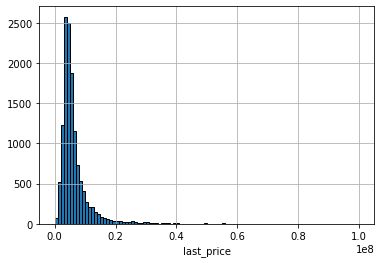

In [46]:
df['last_price'].hist(bins = 100, range = (0,100000000), edgecolor = 'black')
plt.xlabel('last_price');

Основные значения лежат около 5 млн. Небольшой хвост до 40 млн. Так же есть выбросы до 400 млн.

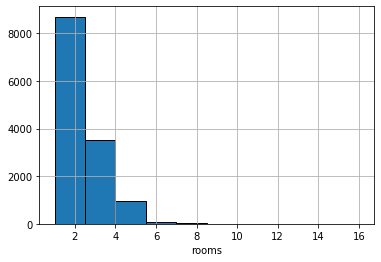

In [47]:
# гистограмма количества комнат в квартире
df['rooms'].hist(edgecolor = 'black')
plt.xlabel('rooms');

На гистограмме видно, что квартиры с 1-2 комнатами встречаются чаще всего. Квартир с 3-5 комнатами меньше, но они занимают существенную часть. А вот количество квартир с 6+ комнатами очень близко к нулю. Так же у нас есть квартира с 16 комнатами.

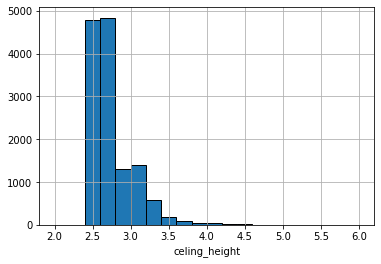

In [48]:
# гистограмма высоты потолков в квартире
df['ceiling_height'].hist(edgecolor = 'black', range = (2, 6), bins = 20)
plt.xlabel('celing_height');

В этом столбце мы уже откинули аномальные значения, так что смотрим на красивое распределение. Пик высоты потолков приходит на диапазон окола 2.6 метров. Количество квартир с высотой потолков >3.5 метров близко к нулю.

Вывели гистограммы для заданных параметров. Увидели некоторые выбросы. С этим нужно работать. Но, прежде чем их убирать, изучим время продажи квартиры.

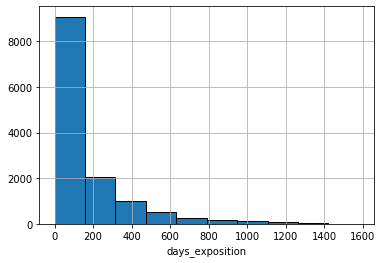

In [49]:
#выведем гистограмму для столбца 'days_exposition':
df['days_exposition'].hist(edgecolor = 'black')
plt.xlabel('days_exposition');

Пик значений лежит около 100 дней. Есть большой хвост, тянущийся до 4.5 лет. Рассмотри диапазон до 200 дней. 

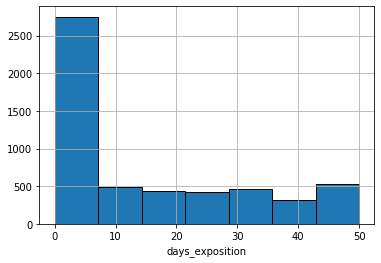

In [50]:
df['days_exposition'].hist(range = (0,50), edgecolor = 'black', bins = 7)
plt.xlabel('days_exposition');

Оказывается, люди очень любят покупать квартиры. Чаще всего они продаются за первые 5 дней. Но меня беспокоят квартиры, которые продались за 0 дней. Очень странные данные, похожие на нереальные выбросы. Выведем более детальную гистограмму и посчитаем количество квартир которые продались за такой нереальный срок. (возможно за 0 берутся квартирыЮ которые продались меньше чем за сутки, но я буду считать, что это какие-то ошибки в системе).

In [51]:
#кол-во квартир, проданные за 0 дней
len(df[df['days_exposition'] == 0])

2273

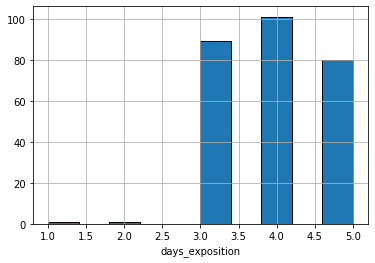

In [52]:
df['days_exposition'].hist(range = (1,5), edgecolor = 'black')
plt.xlabel('days_exposition');


Посчитаем среднее и медиану для этого столбца.

In [53]:
df['days_exposition'].mean()

159.87253574115877

In [54]:
df['days_exposition'].median()

75.0

Что можно сказать об этих данных. Нашли сомнительные значения о квартирах, которые продавались более нескольких лет. Так же нашли нереальные значения, что квартиры продается в моменте. Среднее значение продажи квартиры 160 дней, а медианное равно 75. Оба этих значения сильно искажают выбросы, пора с ними прощаться.

Вернемся к столбцу 'total_area'. Предлагаю убрать из наших данных все квартир с общей площадью более 200 кв.м. Таких значений очень мало. Не берусь говорить о правдоподобности этих данных. но он сильно влияют на статистические данные.

In [55]:
df = df.query('total_area <= 200')

Переходим к столбцу 'last_price'. Значения более 50 млн. встречаются очень редко. Давайте избавимся и от них.

In [56]:
df = df.query('last_price <= 50000000') 

Со значениями столбца 'days_exposition' мы уже разобрались. Осталось их исправить. Уберем все строки, где значения days_exposition равны нулю.

In [57]:
df = df.query('days_exposition != 0') 

Мы сделали это! Теперь можно искать статистические данные. Давайте узнаем, какие факторы больше всего влияют на стоимость квартиры.
* зависит ли цена от площади, числа комнат, удалённости от центра
* рассчитать зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом
* рассчитать зависимость от даты размещения: дня недели, месяца и года.

Построим диаграмму рассеивания для значений из первого пункта и посчитаем коэффициент корреляции. 

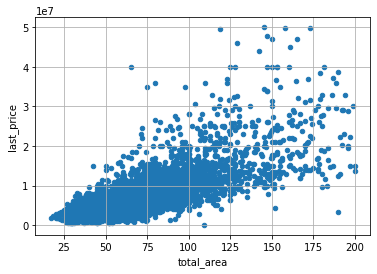

In [58]:
#зависимости цены от площади
df.plot.scatter(
    x = 'total_area',
    y = 'last_price',
    grid = True
);

In [59]:
#коэффициент корреляции 
df['last_price'].corr(df['total_area'])

0.7756154342002765

Что мы видим на диаграмме? Квартиры с самой малой площадью растут пропорционально площади. Затем, когда речь заходит о больших размерах, цена перестает расти от увеличения размеров квартиры. Также имеются выбросы, большие цены за квартиры с малой площадью и наоборот. В общем можно сделать вывод, размеры квартиры влияют на формирование цены, особенно, когда мы рассматриваем малые и средние по площади квартир, но это не единственный фактор. Это и подтверждает коэффициент корреляции, который мы рассчитали. Переходим дальше.

In [60]:
df['rooms'].describe()

count    10902.000000
mean         2.058338
std          0.972746
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

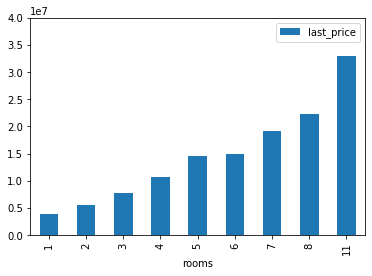

In [61]:
df.pivot_table(
    index = 'rooms', values = 'last_price', aggfunc = 'mean'
).reset_index().plot.bar(
    x = 'rooms',
    y = 'last_price',
    ylim = (0,40000000 )
);

In [62]:
#коэффициент корреляции 
df['last_price'].corr(df['rooms'])

0.4832575958620762

И как можно прокомментировать эту зависимость? Видно, что каждая группа (по кол-ву комнат) квартир имеет большой разброс цен. По началу может показаться, что цена на квартиру складывается из количества комнат, но нельзя это выбрать причиной (об этом говорит большой разброс цен в каждом сегменте и низкий коэффициент корреляции). Скорее есть связь, что, чаще всего, площадь будет расти от увеличения количества комнат, поэтому и цена растет на такие квартиры.

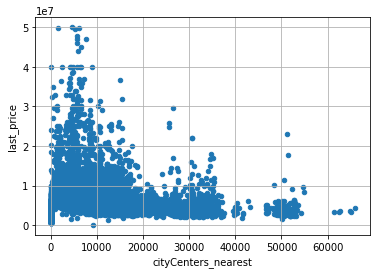

In [63]:
#зависимости цены от удаленности от центра
df.plot(
    x = 'cityCenters_nearest',
    y = 'last_price',
    kind = 'scatter',
    grid = True
);

In [64]:
#коэффициент корреляции 
df['last_price'].corr(df['cityCenters_nearest'])

-0.07201724881245815

Мы подтвердили известный факт, квартиры в центре дороже, а за городом дешевые. А вот живете вы в Лефортово или в Люблино особой роли не играет.

Теперь рассчитаем зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Сгруппируем значения цены по группам в столбце 'floors_group' и выведем среднее и медианной значение.

In [65]:
#зависимости цены от этажа в доме
df.pivot_table(index = 'floors_group', values = 'last_price', aggfunc = ['mean', 'median'])

,mean,median
,last_price,last_price
floors_group,,
другой,6.100972e+06,4900000
первый,4.638010e+06,3990000
последний,5.732601e+06,4400000


Построем график по средним значениям цены.

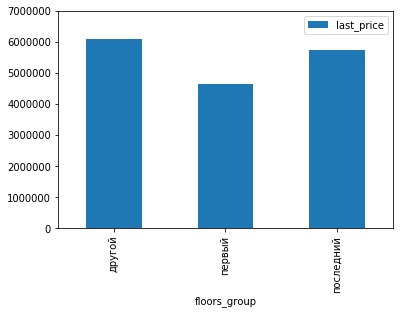

In [66]:
df.pivot_table(
    index = 'floors_group',
    values = 'last_price',
    aggfunc = 'mean',
).reset_index().plot.bar(
    x = 'floors_group',
    y = 'last_price',
    ylim = (0,7000000 )
);

Видно, что полученные значения лежат примерно в одном диапазоне (1 - 10 млн.). Квартиры на первом этаже - самые дешевые, а в середине дома - самые дорогие, но различие не велико, так что делаем вывод, что если и этаж квартиры в доме как-то и влияет на ценообразование, то очень слабо. 

Рассчитываем третью зависимость. Посмотрим, как зависит цена от даты размещения: дня недели, месяца и года. Для этого построим графики зависимости и выведем коэффициент корреляции.

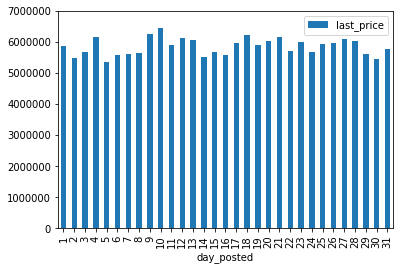

In [67]:
df.pivot_table(
    index = 'day_posted', values = 'last_price', aggfunc = 'mean'
).reset_index().plot.bar(
    x = 'day_posted',
    y = 'last_price',
    ylim = (0,7000000 )
);

In [68]:
df['last_price'].corr(df['day_posted'])

0.00536509198383756

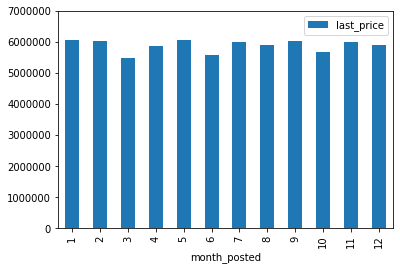

In [69]:
df.pivot_table(
    index = 'month_posted', values = 'last_price', aggfunc = 'mean'
).reset_index().plot.bar(
    x = 'month_posted',
    y = 'last_price',
    ylim = (0,7000000 )
);

In [70]:
df['last_price'].corr(df['month_posted'])

0.0007611404688594428

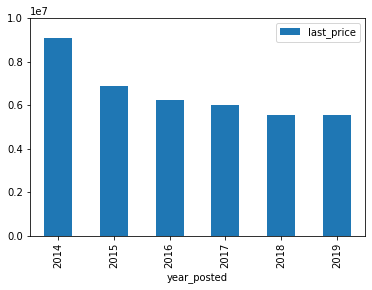

In [71]:
df.pivot_table(
    index = 'year_posted', values = 'last_price', aggfunc = 'mean'
).reset_index().plot.bar(
    x = 'year_posted',
    y = 'last_price',
    ylim = (0,10000000 )
);

In [72]:
df['last_price'].corr(df['year_posted'])

-0.08602594219266921

In [73]:
df['first_day_exposition']

4       2018-06-19
9       2017-02-26
10      2017-11-16
13      2017-07-01
16      2017-11-23
           ...    
23686   2017-04-29
23688   2019-04-01
23689   2018-02-28
23691   2016-10-13
23693   2016-08-05
Name: first_day_exposition, Length: 10902, dtype: datetime64[ns]

Какой вывод можно сделать. Продажа квартир хоть и не сезонный бизнес, но на графике зависимости видно, что квартиры в начале и конце года обычно дороже. Причиной этого может быть больший спрос. Возможно каждый новый год является психологическим фактором, который толкает на покупку квартиры. Коэффициенты корреляции каждой зависимости говорит нам о том, что день, месяц, год размещения объявления не влияет на формирование цены. Но благодаря третьему графику (графику зависимости цены от года размещения объявления) мы можем увидеть факт, что с 2014 года цены на квартиры падали. но это нельзя назвать казуальностью роста цены на квартиру, скорее это связано с другими факторами экономики страны. 

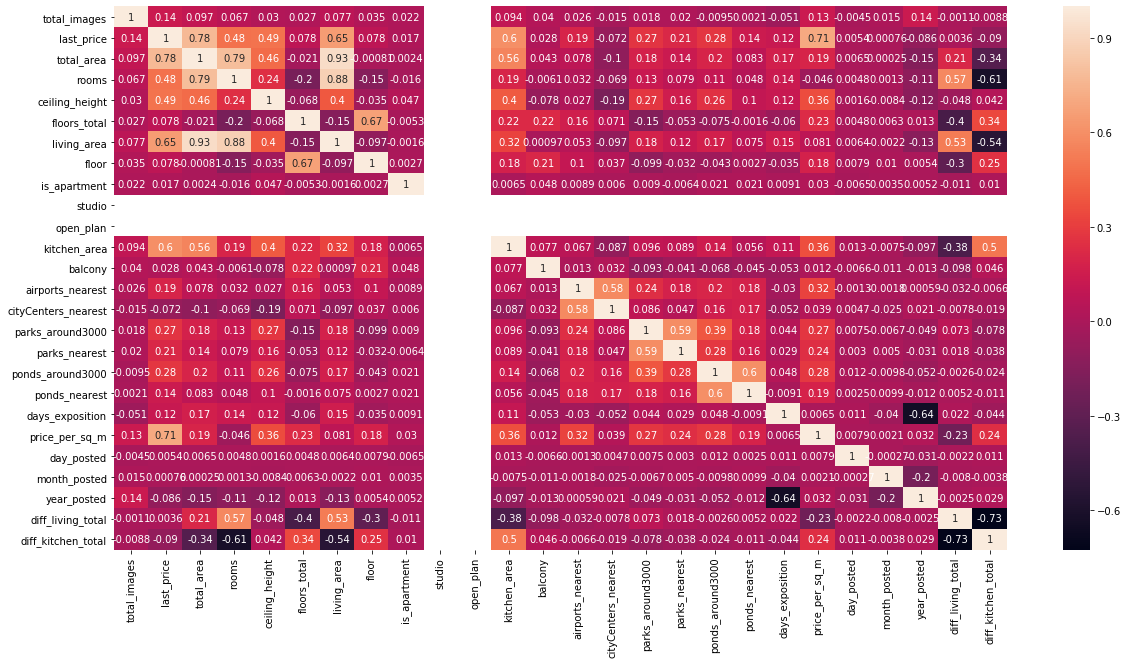

In [74]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, ax = ax);

Переходим дальше. Теперь нам нужно проанализировать цены на квартиры в 10 самых популярных регионах. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [75]:
# посчитаем количество объявлений и среднюю цену за кв. м. для каждого региона
stat_region = df.pivot_table(index = 'locality_name', values = 'price_per_sq_m', aggfunc = ['count', 'mean'])
# сразу избавимся от мультииндексов, переименуем полученные столбцы
stat_region.columns = ['count', 'mean_price_per_sq_m']

In [76]:
# выберем из 'stat_region' 10 регионов с самым большим количеством объявлений, отсортируем его по убыванию средней цены за кв.м.
stat_region.sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'mean_price_per_sq_m', ascending = False)

,count,mean_price_per_sq_m
locality_name,,
санкт-петербург,7622,109815.514038
пушкин,174,101936.074713
деревня кудрово,104,90644.365385
поселок парголово,114,90111.938596
поселок мурино,186,86948.016129
петергоф,120,83629.716667
поселок шушары,181,78477.839779
колпино,169,74656.905325
гатчина,112,68700.383929


Как и ожидалось, В Санкт-Петербург	продаётся больше всего квартир, и они там самый дорогие. Хотя разница в цене не так сильно обгоняет ближайших конкурентов, как количества объявлений. В этом Санкт-Петербург в разы обходит своих конкурентов. А вот все остальные регионы примерно равны по этому значению. Самые дешевые квартире продаются в Всеволожске. По ценовой категории очень рядом с ними находятся квартиры из Гатчины.

Подробнее изучим предложение квартир в Санкт-Петербурге. Выясним, какая область входит в центр. Для этого нужна построить график зависимости цены от удаленности от центра. Для удобства, создадим столбец с расстоянием до центра в километрах. Только уберем из данных строки, где значение столбца 'cityCenters_nearest' равны 0, так как в предобработке данных пропущенные значения заполняли нулем. И сделаем выборку объявлений о продаже квартиры в Санкт-Петербурге.  

In [77]:
# функция для создания нового столбца
def do_cityCenters_nearest_km(raw):
    return round(raw['cityCenters_nearest'] / 1000)

In [78]:
# создаем новую структура данных с выборкой
stat_Saint_Petersburg = df.query('cityCenters_nearest != 0 and locality_name == "санкт-петербург"')

In [79]:
# добавим столбце с расстоянием до центра в км. в наши данные
stat_Saint_Petersburg['cityCenters_nearest_km'] = df.apply(do_cityCenters_nearest_km, axis = 1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
# посмотрим на значения нашего столбца
stat_Saint_Petersburg['cityCenters_nearest_km'].describe()

count    7611.000000
mean       11.656944
std         4.646948
min         0.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        29.000000
Name: cityCenters_nearest_km, dtype: float64

Построим график, который будет отражать зависимость, как средняя цена на квартиру изменяется при удаления от центра

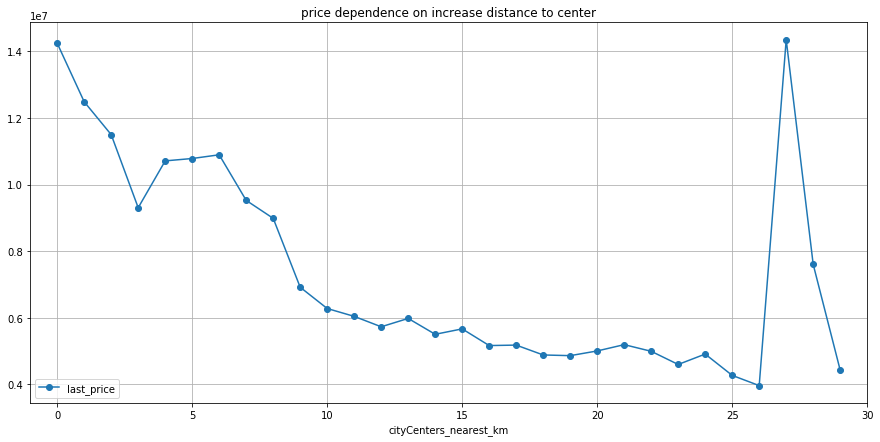

In [81]:
# считаем средние значения цены за квартиру на каждом км. от центра и строим график
stat_Saint_Petersburg.pivot_table(
    index = 'cityCenters_nearest_km', values = 'last_price', aggfunc = 'mean'
).plot(
    use_index = True,
    y = 'last_price',
    style='o-',
    xlim = (-1, 30),
    grid = True,   
    figsize=(15, 7),
    title = 'price dependence on increase distance to center'
);


Цена за квартиры за квартиры, находящиеся почти на центральной площади самые дорогие. После них идёт спад. В квартирах с расстоянием 2-8 км. до центра цена падает по немного, затем, при увеличении расстояния до 9-10 км. можно наблюдать резкий спад цены. Учитывая, что квартиры в центре города стоят на порядок дороже, определим центр города Санкт-Петербург всей территорией, которая находится в радиусе 8 км. от центра.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
График в целом верный, но его нужно дофоормить, можно помимо оформления осей и заголовка стоит изменить размер графика.

Подробнее рассмотрим изменения цен на квартиру в центре культурной столицы России. Выделим только те сроки, где значения удаленности от центра не больше 8 км. Изучим значения площади, цены, числа комнат, высоты потолков. Посмотрим, какие факторы влияют на ценообразование.

In [82]:
# сохраним выборку объявлений о прадаже квартир в центре Петербурга
stat_centre_Saint_Petersburg = stat_Saint_Petersburg.query('cityCenters_nearest_km <= 8')

Построим гистограммы площади, цены, числа комнат, высоты потолков для квартир в центре. Так же построим гистограммы для этих же значений, но для всех квартир из наших данных. Так будет удобней проводить сравнение.

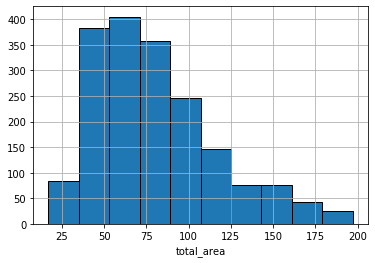

In [83]:
# гистограмма площади
stat_centre_Saint_Petersburg['total_area'].hist(edgecolor = 'black')
plt.xlabel('total_area');

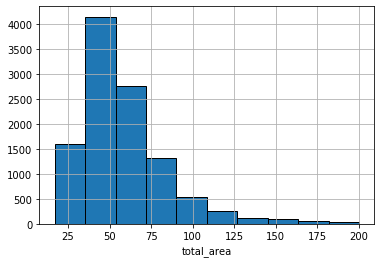

In [84]:
df['total_area'].hist(edgecolor = 'black')
plt.xlabel('total_area');

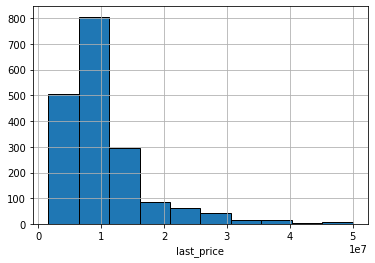

In [85]:
# гистограмма цены
stat_centre_Saint_Petersburg['last_price'].hist(edgecolor = 'black')
plt.xlabel('last_price');

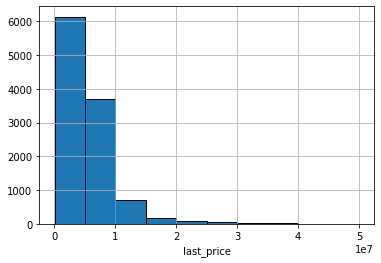

In [86]:
df['last_price'].hist(edgecolor = 'black')
plt.xlabel('last_price');

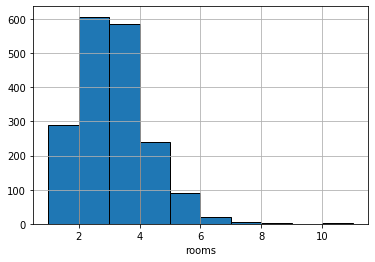

In [87]:
# гистограмма числа комнат
stat_centre_Saint_Petersburg['rooms'].hist(edgecolor = 'black')
plt.xlabel('rooms');

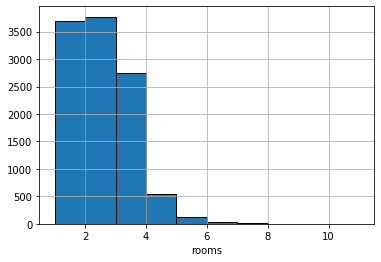

In [88]:
df['rooms'].hist(edgecolor = 'black')
plt.xlabel('rooms');

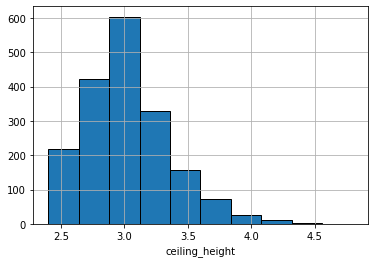

In [89]:
# гистограмма высоты потолков
stat_centre_Saint_Petersburg['ceiling_height'].hist(edgecolor = 'black')
plt.xlabel('ceiling_height');

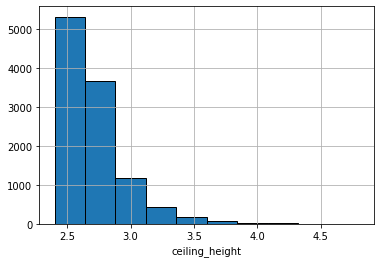

In [90]:
df['ceiling_height'].hist(edgecolor = 'black')
plt.xlabel('ceiling_height');

Посмотри и на диапазон значений двух таблиц.

In [91]:
stat_centre_Saint_Petersburg.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,day_posted,month_posted,year_posted,diff_living_total,diff_kitchen_total,cityCenters_nearest_km
count,1843.000000,1.843000e+03,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,...,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,10.209441,1.040434e+07,80.361432,2.636462,3.020260,7.260988,47.314867,4.264786,13.173299,0.361910,...,1.253391,324.250136,249.984807,128465.347260,15.428649,6.612588,2017.116658,0.580212,0.175014,4.984265
std,6.015595,6.881472e+06,35.485284,1.164632,0.337213,4.199779,24.222327,3.057429,7.521714,0.773336,...,1.089050,310.567749,275.342509,47354.716906,8.606974,3.478130,1.033615,0.110592,0.081086,2.046228
min,0.000000,1.600000e+06,17.000000,1.000000,2.400000,2.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,3.000000,16842.000000,1.000000,1.000000,2014.000000,0.040000,0.030000,0.000000
25%,6.000000,6.200000e+06,53.000000,2.000000,2.760000,5.000000,30.000000,2.000000,8.550000,0.000000,...,0.000000,0.000000,60.000000,97617.500000,8.000000,3.000000,2017.000000,0.520000,0.120000,4.000000
50%,10.000000,8.400000e+06,73.000000,3.000000,3.000000,6.000000,43.500000,4.000000,11.000000,0.000000,...,1.000000,265.000000,144.000000,117857.000000,15.000000,7.000000,2017.000000,0.590000,0.150000,5.000000
75%,15.000000,1.200000e+07,98.500000,3.000000,3.200000,9.000000,59.850000,5.000000,15.000000,0.000000,...,2.000000,562.000000,350.500000,145988.500000,23.000000,10.000000,2018.000000,0.660000,0.210000,7.000000
max,50.000000,5.000000e+07,197.200000,11.000000,4.800000,28.000000,150.800000,25.000000,75.000000,5.000000,...,3.000000,1251.000000,1512.000000,612557.000000,31.000000,12.000000,2019.000000,0.900000,0.620000,8.000000


In [92]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sq_m,day_posted,month_posted,year_posted,diff_living_total,diff_kitchen_total
count,10902.000000,1.090200e+04,10902.000000,10902.000000,10902.000000,10902.000000,10902.000000,10902.000000,10902.000000,10902.000000,...,10902.000000,10902.000000,10902.000000,10902.000000,10902.000000,10902.000000,10902.000000,10902.000000,10902.000000,10902.000000
mean,10.174280,5.870462e+06,58.186010,2.058338,2.710305,10.311778,33.451189,5.687764,10.181917,0.700972,...,172.210328,0.604476,205.993946,191.392130,97860.229407,15.391763,6.586039,2017.321409,0.565630,0.185752
std,5.559965,4.358143e+06,25.758056,0.972746,0.250794,6.211994,17.146544,4.644061,5.159776,1.003030,...,297.026136,0.889991,310.728235,227.737231,35390.927997,8.680361,3.492437,0.959112,0.100972,0.071054
min,0.000000,1.219000e+04,17.000000,1.000000,2.400000,1.000000,2.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,111.000000,1.000000,1.000000,2014.000000,0.040000,0.030000
25%,6.000000,3.550000e+06,40.400000,1.000000,2.510000,5.000000,19.000000,2.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,45.000000,78077.500000,8.000000,3.000000,2017.000000,0.500000,0.130000
50%,10.000000,4.700000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,106.000000,95222.500000,15.000000,7.000000,2017.000000,0.570000,0.170000
75%,14.000000,6.600000e+06,68.837500,3.000000,2.800000,14.000000,42.000000,8.000000,11.522500,1.000000,...,330.000000,1.000000,407.000000,249.000000,113263.500000,23.000000,10.000000,2018.000000,0.640000,0.230000
max,50.000000,5.000000e+07,200.000000,11.000000,4.800000,60.000000,150.800000,27.000000,75.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,612557.000000,31.000000,12.000000,2019.000000,0.970000,0.720000


Различаются ли в чем-то квартире в центре города от общей массы? Что можно сказать о данных?
* Больших квартир в центре относительно больше.
* В среднем цены на квартиры в центре выше, чем за его пределами. Так же количество квартир, находящихся в хвосте (наибольшая цена), в центре относительно больше. 
* Относительно количества комнат можно сказать, что различия не большие. Единственное, что можно заметить сразу – это то, что процент квартир с одной комнатой в центральной части нашего города меньше. 
* Пик высоты потолков, в рассматриваемой зоне, падает на 3 метра, когда в массе всех объявлений он приходится на 2.6 метра.


Далее посмотрим, как разные факторы влияют на ценообразование.

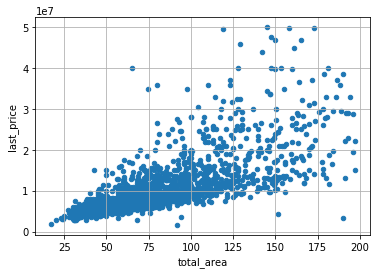

In [93]:
#зависимости цены от площади
stat_centre_Saint_Petersburg.plot(
    x = 'total_area',
    y = 'last_price',
    kind = 'scatter',
    grid = True
);

In [94]:
#коэффициент корреляции 
stat_centre_Saint_Petersburg['last_price'].corr(stat_centre_Saint_Petersburg['total_area'])

0.7219326658205198

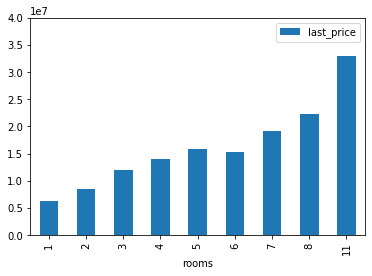

In [95]:
#зависимости цены от числа комнат
stat_centre_Saint_Petersburg.pivot_table(
    index = 'rooms', values = 'last_price', aggfunc = 'mean'
).reset_index().plot.bar(
    x = 'rooms',
    y = 'last_price',
    ylim = (0,40000000 )
);

In [96]:
#коэффициент корреляции 
stat_centre_Saint_Petersburg['last_price'].corr(stat_centre_Saint_Petersburg['rooms'])

0.4242320122359285

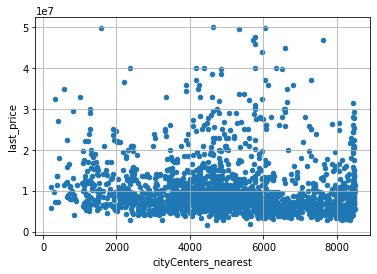

In [97]:
#зависимости цены от удаленности от центра
stat_centre_Saint_Petersburg.plot(
    x = 'cityCenters_nearest',
    y = 'last_price',
    kind = 'scatter',
    grid = True
)

In [98]:
#коэффициент корреляции 
stat_centre_Saint_Petersburg['last_price'].corr(stat_centre_Saint_Petersburg['cityCenters_nearest'])

-0.1022880320251564

In [99]:
#зависимости цены от этажа в доме
stat_centre_Saint_Petersburg.pivot_table(index = 'floors_group', values = 'last_price', aggfunc = ['mean', 'median'])

,mean,median
,last_price,last_price
floors_group,,
другой,1.091279e+07,8700000
первый,7.664984e+06,6200000
последний,1.004104e+07,8500000


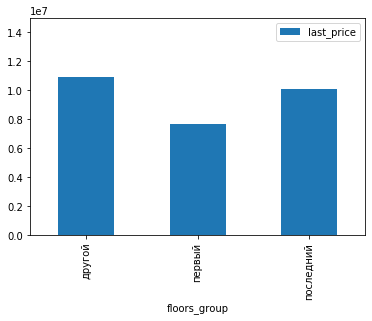

In [100]:
stat_centre_Saint_Petersburg.pivot_table(
    index = 'floors_group',
    values = 'last_price',
    aggfunc = 'mean',
).reset_index().plot.bar(
    x = 'floors_group',
    y = 'last_price',
    ylim = (0,15000000 )
);

Посмотрим на последнюю зависимость, как влияет дата размещения объявления на цену. Построим графики и коэффициент корреляции от дня, месяца, года размещения объявления

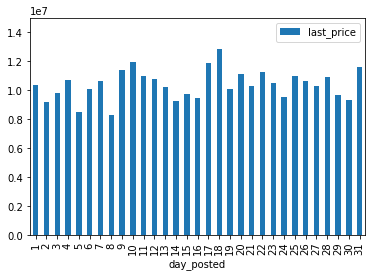

In [101]:
stat_centre_Saint_Petersburg.pivot_table(
    index = 'day_posted', values = 'last_price', aggfunc = 'mean'
).reset_index().plot.bar(
    x = 'day_posted',
    y = 'last_price',
    ylim = (0,15000000 )
);

In [102]:
stat_centre_Saint_Petersburg['last_price'].corr(stat_centre_Saint_Petersburg['day_posted'])

0.022229233994242818

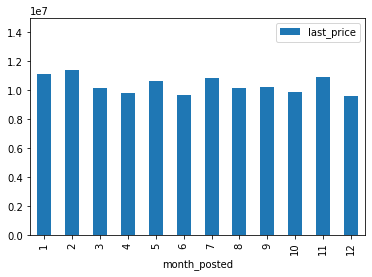

In [103]:
stat_centre_Saint_Petersburg.pivot_table(
    index = 'month_posted', values = 'last_price', aggfunc = 'mean'
).reset_index().plot.bar(
    x = 'month_posted',
    y = 'last_price',
    ylim = (0,15000000 )
);

In [104]:
stat_centre_Saint_Petersburg['last_price'].corr(stat_centre_Saint_Petersburg['month_posted'])

-0.03364642393438004

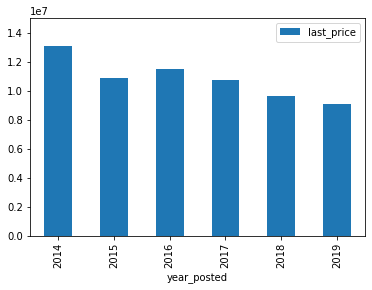

In [105]:
stat_centre_Saint_Petersburg.pivot_table(
    index = 'year_posted', values = 'last_price', aggfunc = 'mean'
).reset_index().plot.bar(
    x = 'year_posted',
    y = 'last_price',
    ylim = (0,15000000 )
);

In [106]:
stat_centre_Saint_Petersburg['last_price'].corr(stat_centre_Saint_Petersburg['year_posted'])

-0.09743446844752693

Из полученных значений можно сделать вывод, что так же как и на остальных регионах, в центре Петербурга цена не зависит от даты выставления объявления. Выводы о том, что люди больше покупают квартиры в начале и конце года и, о кономической тенденции на протяжении лет с 2014 по 2019 , подтверждаются.

В чем заключается различие влияние разных факторов на образование цен в центре и за его пределами?
* В центре менее востребованы квартиры на первом этаже, об это говорит цена. Возможно, людей смущает посторонние звуки, ведь в центре улицы намного шумнее, чем за его пределами.
* Как мы уже выяснили, цены в центре не сильно разнятся от расстояния до центральной площади. Это демонстрирует нам график и коэффициент корреляции.
* Ситуация с количеством комнат и общей площадью влияет на ценообразование квартиры в центре ровно столько же, как и на любой другой территории, что логично. Не все готовы пожертвовать условиями, ради проживания в шаговой доступности от центральной площади.
* Так же, как и в остальных случаях, дата выставления объявления о продаже, почти не влияет на покупку квартиры.

Мне кажется, что мы получили очень логичный результат. 
Чего хочется добавить. Квартиры в центре более дорогие, это для нас не новость. Но они дороже не только из-за своего местоположения. Факторы ,из которых складывается цена у квартир, в центре города лучше. Потолки выше, площадь больше.

## Общий вывод

Вот и подошла к концу наша работа. Первую часть работы мы обрабатывали наши данные, высчитывали новые, нужные для анализа, значения. Затем начался анализ. В нем мы:
* Нашли, какие квартиры встречаются чаще – это квартиры с 1-2 комнатами, высотой потолков примерно в 2.6 метра и с площадью около 40 кв. м. Соответственно очень больших и слишком маленьких квартир меньше.
* Выяснили какие из каких факторов складывается цена. Самый главный из них – площадь квартиры. Меньшую роль играет факт, находится ли ваша квартира в центре.
* Посмотрели на разность цен на квартиру топ 10 самых населенных регионах. Увидели, что Санкт-Петербург в разы обошел всех своих конкурентов.
* Затем мы перешли к анализу объявлений о продаже квартир в центре славного Санкт-Петербурга.  Поняли, что квартиры там дороже. Но дороже они не только из-за близкого расположения к центру, но и из-за более высокого класса этих квартир. Средняя квартира в центре Санкт-Петербурга – это квартира с 1-2 комнатами, площадью около 65 кв. м. и с высотой потолков равной 3 метрам. Факторы, влияющие на ценообразование схожи, но есть и отличии, такие как: в центре квартиры на первом этаже квартиры стоят на порядок дешевле; если квартира находится в центральной части города, то расстояние до центральной площади не сильно влияет на цену.

Результаты, полученные в ходе выполнения работы логичны. Найдена интересная тенденция, что в определенные месяца цены на квартиры немного вырастает. Как все-таки формируется рыночная стоимость объектов недвижимости? При формировании цены нужно смотреть в первую очередь на расположение квартиры и на её площадь. Расположение имеет два фактора. Первый – это регион, в котором находится квартира. В некоторых регионах цена за квадратный метр может сильно разнится. Второй – расположение в центре города или за его пределами. С общей площадью квартиры все просто, чем больше квартира, тем больше она стоит.  Это главные параметры, на которые нужно смотреть при ценообразовании. Все остальные параметры (этаж, количество комнат, время, когда вы продаете квартиру) или не влияют на цену квартиры, или их влияние сильно меньше тех факторов, про которые я уже сказал.
